## Imports

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#%matplotlib inline

# Tweaking Data

## DataFrames. Accidents

In [2]:
accidents = pd.read_csv('/Users/fcbnyc/mystuff/repos/BarcelonaAccidents/total_accidents_2018.csv',)
accidents.drop('Unnamed: 0', axis=1,inplace=True)
accidents.isnull().sum().sum()

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0

In [16]:
accidents['target'] = [1 if (row[1] >0 or row[2] >0) else 0 for row in accidents[['severe_injuries','#_deaths']].itertuples()] 





In [25]:
print("Total deaths: ",accidents['#_deaths'].sum(),'\n')
print("Total accidents: ",accidents['incident_#'].count(),'\n')
print("Target: ",accidents['target'].sum())

Total deaths:  241.0 

Total accidents:  86686 

Target:  2201 2201


## Plotting

# Graphs to get:
1. Compare target year to year.
2. Target per month.
3. Targets per week day, weekend and more. 
4. Target per hour of day.
5. Target per district.

## 1. Compare accidents per year with a target per year. What is the ratio of target per accident?

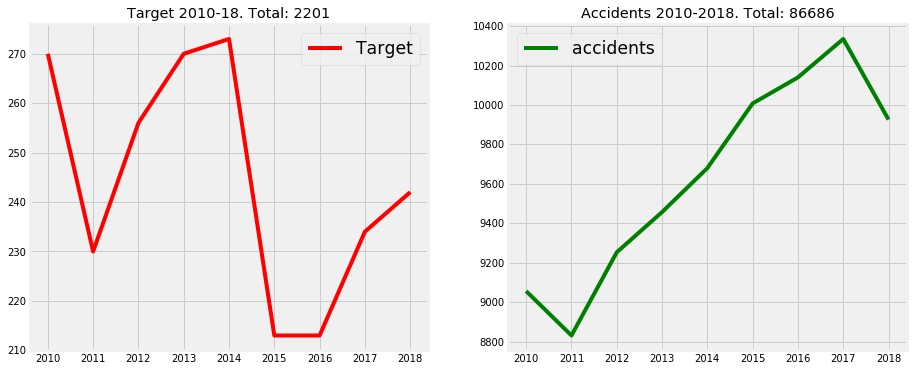

In [26]:
target_per_year = accidents.groupby('year').sum()['target']
accidents_per_year = accidents.groupby('year').count()['incident_#']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.plot(target_per_year, color='r', label ='Target_per_year')
ax2.plot(accidents_per_year, color='g', label='Accidents_per_year.')

ax1.set_title('Target 2010-18. Total: {}'.format(round(accidents['target'].sum(), 0)))
ax2.set_title('Accidents 2010-2018. Total: {}'.format(len(accidents)))
#plt.legend([ax1, ax2],["Deads", "Accidents"])
ax1.legend(["Target"], fontsize ='xx-large')
ax2.legend(["accidents"], fontsize ='xx-large')


plt.savefig('./charts/accidents_deaths_per_year_2018.png');

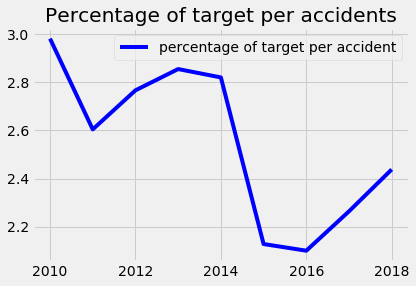

In [43]:
ratio = []
year = list(range(2010, 2019))
for x, z in zip(target_per_year, accidents_per_year):
    ratio.append((x/z)*100)
#print(ratio)
plt.plot(year, ratio, color='blue', label='percentage of target per accident');
average_deads_per_accident = sum(ratio)/8
#plt.axhline(average_deads_per_accident, c='b', label='average of Deads per accident')
plt.legend()
plt.title('Percentage of target per accidents');
plt.savefig('./charts/avg_target_accident_per_year_2018.png');
### The ratio of deads per accident has been decrasing since 2010

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


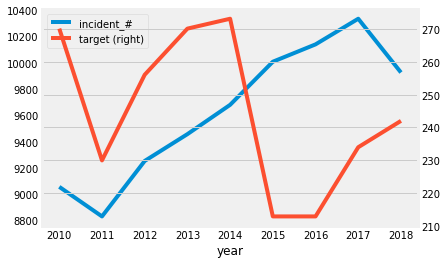

In [39]:
accidents.groupby('year').agg({'#_deaths': 'sum','target': 'sum', 'incident_#': 'count'}).\
plot(y=['incident_#', 'target'], secondary_y=['target'], label=('accidents', 'target'));

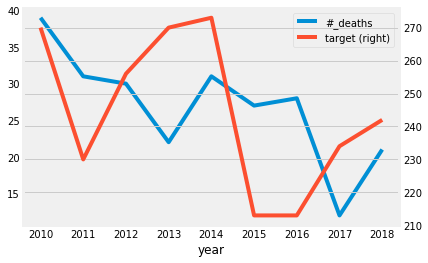

In [37]:
accidents.groupby('year')[['#_deaths','target']].sum().plot(secondary_y=['target']);

## 2. Target/Accidents per month.

In [40]:
mes = accidents.groupby('month_name').agg({'#_deaths': 'sum','incident_#': 'count', 'target': 'sum'})
mes = mes.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',\
'September', 'October', 'November','December'])
mes.columns = ['deaths_per_month', 'accidents_per_month', 'target_per_month']
mes

,deaths_per_month,accidents_per_month,target_per_month
month_name,,,
January,20.0,6937,176
February,22.0,7033,192
March,24.0,7512,189
April,23.0,7207,197
May,16.0,7717,207
June,13.0,7456,181
July,21.0,7599,173
August,26.0,5430,159
September,29.0,6856,175


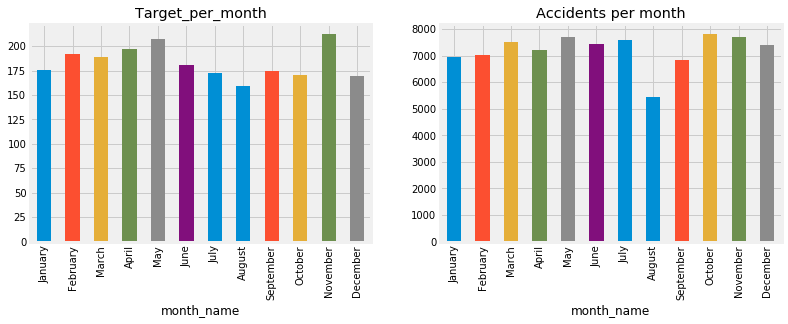

In [41]:
# mes['deaths_per_month'] =deaths_per_month
# mes['accidents_per_month'] = accidents_per_month
mes['target_average'] = mes['target_per_month']/mes['accidents_per_month']


fig, axes = plt.subplots(1,2, figsize=(12,4))
mes['target_per_month'].plot(kind='bar', ax=axes[0], title='Target_per_month');
mes['accidents_per_month'].plot(kind='bar', ax=axes[1], title='Accidents per month');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_month_2018.png');

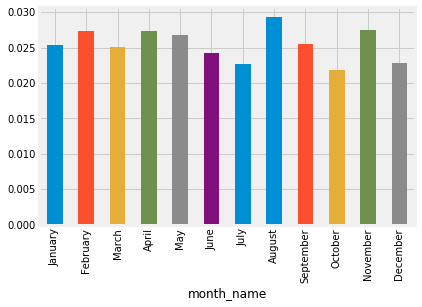

In [15]:
mes['target_average'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_month_2018.png');

## 3. Target/Accidents per week day. Deads per accident per week day.
### What happens during weekends

In [44]:
setmana = accidents.groupby('weekday_name').agg({'#_deaths': 'sum', 'incident_#': 'count', 'target': 'sum'})
setmana = setmana.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
setmana.columns = ['deaths_per_weekday', 'accidents_per_weekday', 'target']
setmana

,deaths_per_weekday,accidents_per_weekday,target
weekday_name,,,
Monday,42.0,13104,311
Tuesday,27.0,13712,329
Wednesday,35.0,14087,332
Thursday,34.0,14163,332
Friday,44.0,14976,395
Saturday,41.0,9427,287
Sunday,18.0,7217,215


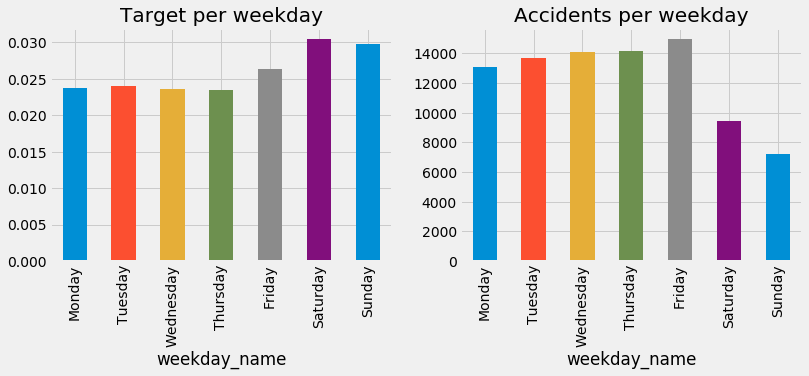

In [47]:
#setmana['average_taget'] = setmana['target']/ setmana['accidents_per_weekday']
setmana['average_target'] = setmana['target']/ setmana['accidents_per_weekday']
fig, axes = plt.subplots(1,2, figsize=(12,4))
setmana['average_target'].plot(kind='bar', ax=axes[0], title='Target per weekday');
setmana['accidents_per_weekday'].plot(kind='bar', ax=axes[1], title='Accidents per weekday');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_weekday_2018.png');

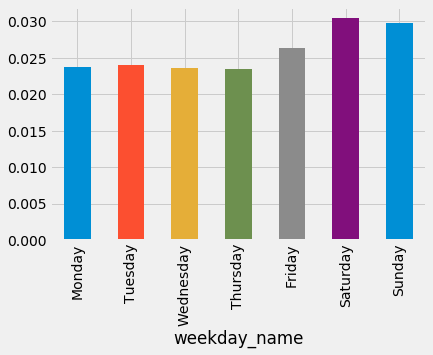

In [50]:
setmana['average_target'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_target_per_weekday_2018.png');

### Watchout Monday and Saturday

## What about the weekend

# It is risky to mix weekday with shift because you are splitting the shift

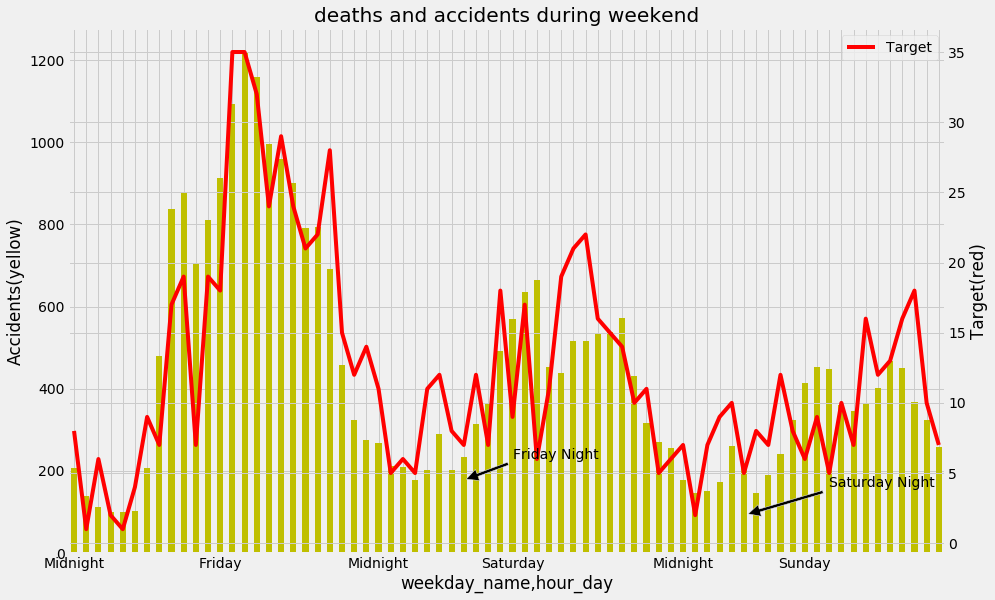

In [52]:
squad = []
for i in range(0,25):
    if i == 0:
        squad.append('Midnight')
    else:
        squad.append('')
        
squad = squad *3
#ax1.set_xticks(x1)
#ax1.set_xticklabels(squad, minor=False, rotation=45
squad[12] = 'Friday'
squad[36] = 'Saturday'
squad[60] = 'Sunday'
weekend =  accidents.loc[accidents['weekday_name'].isin(['Friday', 'Saturday', 'Sunday']), :]
weekend_accidents = weekend.groupby(['weekday_name', 'hour_day']).count()['incident_#']
weekend_target = weekend.groupby(['weekday_name', 'hour_day']).sum()['target']
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
weekend_accidents.plot(kind='bar', color='y', ax=ax, label='Accidents')
weekend_target.plot(kind='line', color='r', ax=ax2, label='Target')
#plt.plot(weekend_reindex_accidents)
#plt.bar(shift, deads_per_shift, color='b', ax=ax2, position=0)
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Target(red)')
ax.set_xticklabels(squad, rotation= 360)
plt.annotate('Friday Night', xy=(32, 4.5), xytext=(36, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.annotate('Saturday Night', xy=(55, 2), xytext=(62, 4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.title('deaths and accidents during weekend')
plt.legend()
plt.legend()
plt.savefig('./charts/accidents_target_per_weekend2_2018.png'); 

## 4. Deads/Accidents per hour of the day.


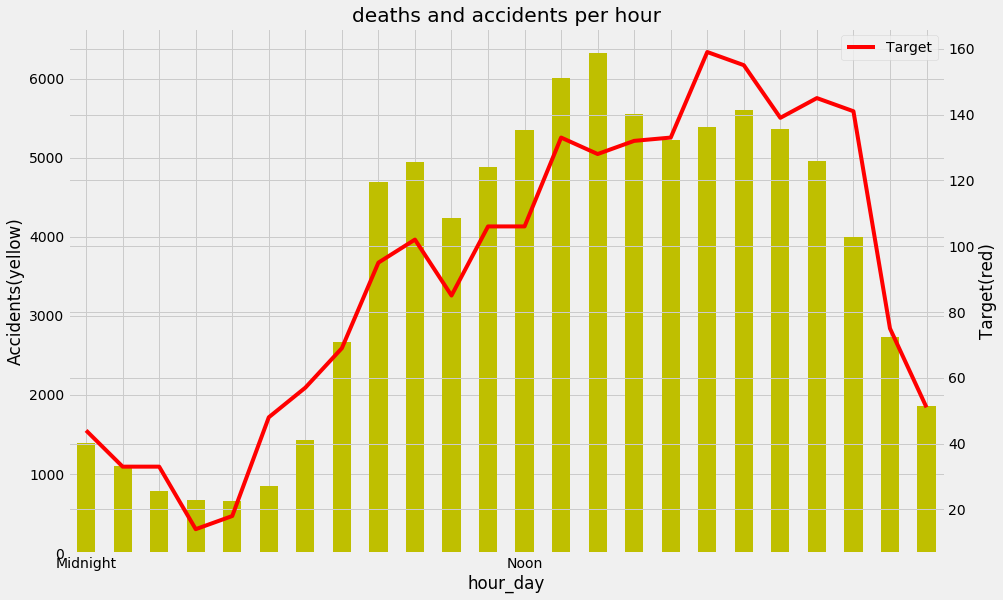

In [60]:
squad2 = []
for i in range(0,24):
    if i == 0:
        squad2.append('Midnight')
    elif i == 12:
        squad2.append('Noon')
    else:
        squad2.append('')

target_per_hour =  accidents.groupby('hour_day').sum()['target']
accidents_per_hour = accidents.groupby('hour_day').count()['incident_#']

fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
accidents_per_hour.plot(kind='bar', color='y', ax=ax, label='Accidents')
target_per_hour.plot(kind='line', color='r', ax=ax2, label='Target')
#plt.plot(weekend_reindex_accidents)
#plt.bar(shift, deads_per_shift, color='b', ax=ax2, position=0)
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Target(red)')
ax.set_xticklabels(squad2, rotation= 360)
# circle_rad = 45
# point = (5, 4500)
# ax.plot(point[0], point[1], 'o',
#         ms=circle_rad * 2, mec='b', mfc='none', mew=2)
# ax.annotate('Breaking Point', xy=point, xytext=(60, 60),
#             textcoords='offset points',
#             color='b', size='large',
#             arrowprops=dict(
#                 arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
#                 facecolor='b', shrinkB=circle_rad * 1.2)
# )
plt.title('deaths and accidents per hour')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_hour_2018.png'); 

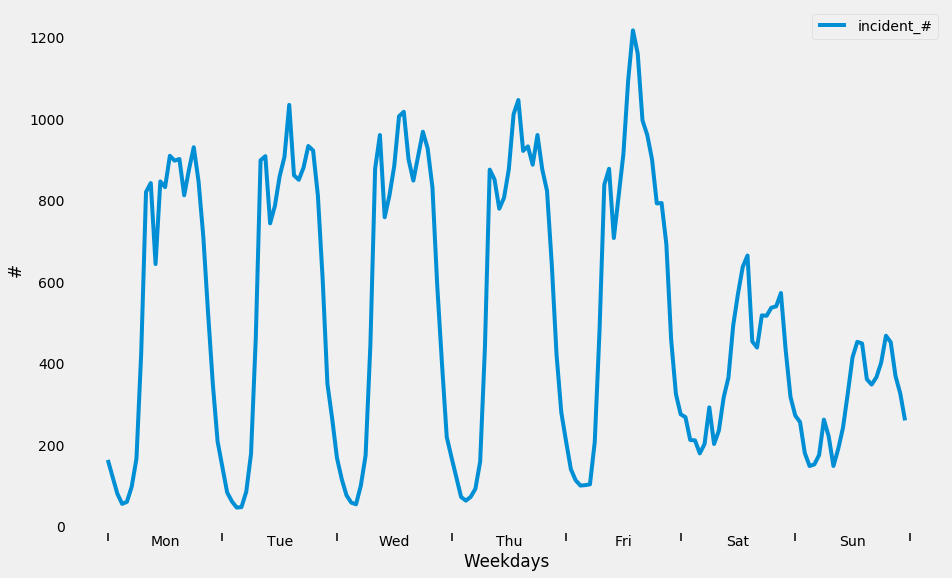

In [55]:
daily_hour = accidents.groupby(['weekday_name', 'hour_day']).agg({'target': 'sum', 'incident_#': 'count'})
#prova.reorder_levels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_hour = daily_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], level=0)
sq = [x for x in ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
from matplotlib.ticker import MultipleLocator, FuncFormatter, NullFormatter
ax = daily_hour.plot(y='incident_#', figsize=(14,9))
ax.set_ylabel("#")
ax.set_xlabel("Weekdays")
ax.grid()
# Now we assume that there is data for every hour and day present
assert len(daily_hour) == 7*24
# Hence we can tick the axis with multiples of 24h
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.xaxis.set_minor_locator(MultipleLocator(1))

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
def tick(x,pos):
    if x % 24 == 12:
        return days[int(x)//24]
    else:
        return ""
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(FuncFormatter(tick))
ax.tick_params(which="major", axis="x", length=10, width=1.5)
plt.show()




In [56]:
### Hour of every day with more accidents
daily_hour_reindex = daily_hour.reset_index()
for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    maxim = (daily_hour_reindex.loc[daily_hour_reindex['weekday_name'] == i, ['incident_#']].max()).values
    print(i,int(maxim))
    hora= daily_hour_reindex.loc[(daily_hour_reindex['weekday_name'] == i) & (daily_hour_reindex['incident_#'] == float(maxim))]['hour_day']
    print(i, 'hour of max accidents:',int(hora))
    #print i
       

Monday 930
Monday hour of max accidents: 18
Tuesday 1034
Tuesday hour of max accidents: 14
Wednesday 1017
Wednesday hour of max accidents: 14
Thursday 1046
Thursday hour of max accidents: 14
Friday 1217
Friday hour of max accidents: 14
Saturday 664
Saturday hour of max accidents: 14
Sunday 467
Sunday hour of max accidents: 19


In [57]:
for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    maxim = (daily_hour_reindex.loc[daily_hour_reindex['weekday_name'] == i, ['target']].max()).values
    print(i,int(maxim))
    hora= daily_hour_reindex.loc[(daily_hour_reindex['weekday_name'] == i) & (daily_hour_reindex['target'] == int(maxim))]['hour_day']
    print(i, 'hour of max accidents:',hora.values)
    #print i

Monday 26
Monday hour of max accidents: [17.]
Tuesday 35
Tuesday hour of max accidents: [18.]
Wednesday 27
Wednesday hour of max accidents: [20.]
Thursday 29
Thursday hour of max accidents: [19.]
Friday 35
Friday hour of max accidents: [13. 14.]
Saturday 22
Saturday hour of max accidents: [18.]
Sunday 18
Sunday hour of max accidents: [21.]


In [64]:
daily_hour.groupby('hour_day').agg({'target': 'sum', 'incident_#': 'sum'})['target']

hour_day
0.0      44
1.0      33
2.0      33
3.0      14
4.0      18
5.0      48
6.0      57
7.0      69
8.0      95
9.0     102
10.0     85
11.0    106
12.0    106
13.0    133
14.0    128
15.0    132
16.0    133
17.0    159
18.0    155
19.0    139
20.0    145
21.0    141
22.0     75
23.0     51
Name: target, dtype: int64

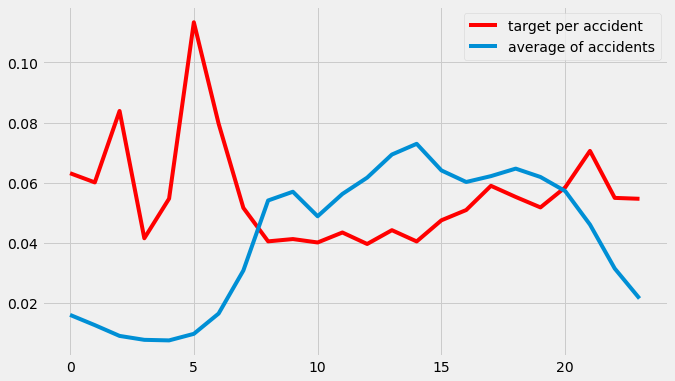

In [69]:
target_per_hour = daily_hour.groupby('hour_day').agg({'target': 'sum', 'incident_#': 'sum'})['target']
accidents_per_hour = daily_hour.groupby('hour_day').agg({'target': 'sum', 'incident_#': 'sum'})['incident_#']
average = []
average_total = []
for i, t in zip(target_per_hour, accidents_per_hour):
    average.append(i/t)
    average_total.append(t/len(accidents))

average_adjusted = []

for item in average:
    
    average_adjusted.append(item*2)
    
    
plt.figure(figsize=(10,6))    
plt.plot(accidents_per_hour.index, average_adjusted, color = 'r', label='target per accident');
plt.plot(accidents_per_hour.index, average_total, label ='average of accidents')
plt.legend()
plt.savefig('./charts/target_average_per_hour_2018.png')

## 5. Target/Accidents per district. 


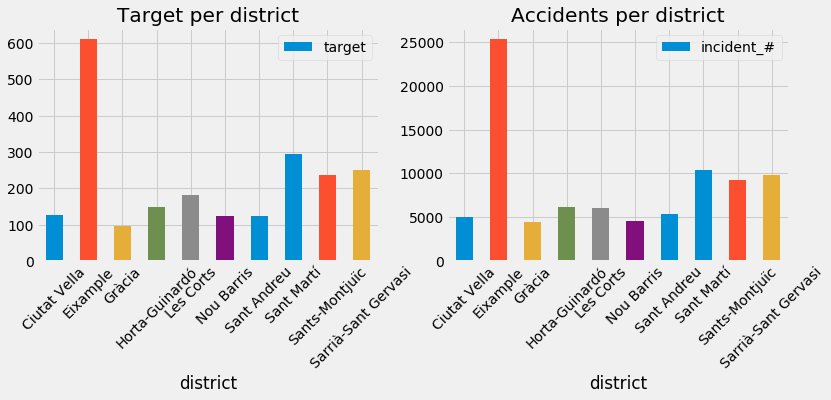

In [83]:
district = accidents.groupby('district').agg({'incident_#': 'count', 'target': 'sum'})
district.drop('Desconegut', inplace=True)
district['average'] = district['target']/district['incident_#']
target_per_district = accidents[accidents['district'] != 'Desconegut'].groupby('district').sum()['target']
accidents_per_district = accidents[accidents['district'] != 'Desconegut'].groupby('district').count()['incident_#']
fig, axes = plt.subplots(1,2, figsize=(12,4))
district.plot(kind='bar', ax=axes[0], y='target', title='Target per district',rot=45);
#plt.line(accidents_per_district.index, average_1000, c='r')
district.plot(kind='bar', ax=axes[1], y='incident_#', title='Accidents per district', rot=45);
#deads_per_weekday[['Friday', 'Saturday', 'Sunday']].plot(kind='bar');
plt.savefig('./charts/target_accidents_per_district_2018.png')

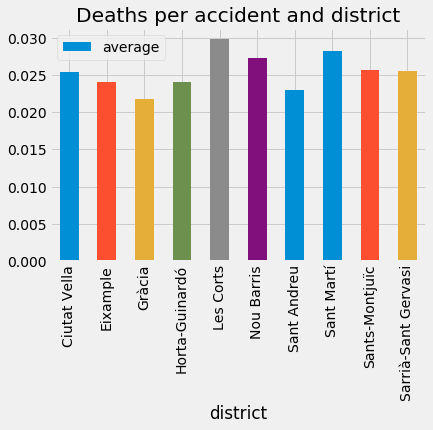

In [85]:
district.plot(kind='bar', y='average', title='Deaths per accident and district');

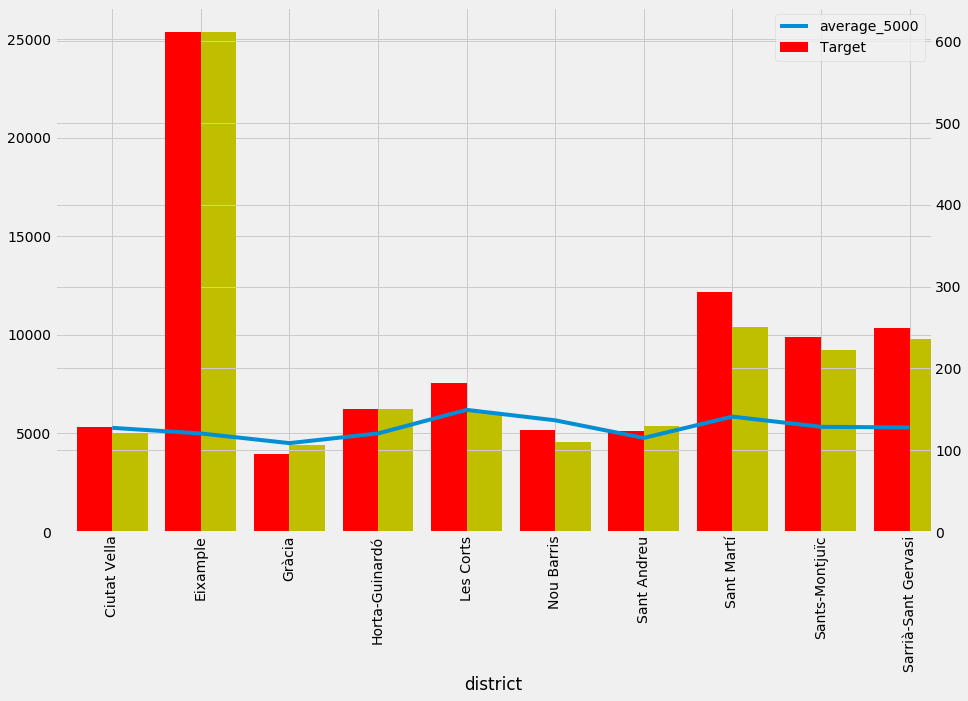

In [90]:

fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
district['average_5000'] = 5000 * district['average']
width = 0.4
district['incident_#'].plot(kind='bar', color='y', ax=ax, position=0, width= width, label='Accidents')
district['target'].plot(kind='bar', color='r', ax=ax2, position=1, width=width, label='Target');
district['average_5000'].plot(kind='line')
plt.legend()
plt.savefig('./charts/ratio_per_district_2018.png');

### About the deads, minor injures, severely injured and victims

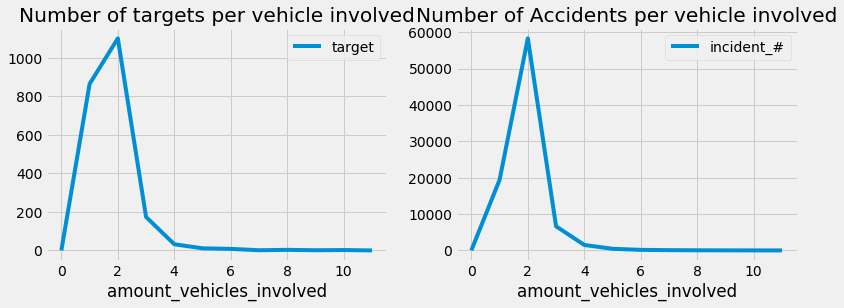

In [99]:
accidents['amount_vehicles_involved'] = accidents['amount_vehicles_involved'].astype(int)
number_vehicles = accidents.groupby('amount_vehicles_involved').agg({'incident_#': 'count', 'target': 'sum'})
#number_vehicles = accidents.groupby('amount_vehicles_involved').count()['#_deaths']
fig, axes = plt.subplots(1,2, figsize=(12,4))

number_vehicles[0:12].plot(kind='line', ax=axes[0], y ='target',\
                                 title="Number of targets per vehicle involved")
number_vehicles[0:12].plot(kind='line', ax=axes[1],y = 'incident_#',\
                                 title="Number of Accidents per vehicle involved");

In [106]:
number_total_accidents = len(accidents)
number_total_deaths = int(accidents['#_deaths'].sum())
number_total_target = int(accidents['target'].sum())
number_total_accidents, number_total_target

(86686, 2201)

## Pedestrian Analysis

In [34]:
##Double checking the columns
is_role = [ x for x in accidents.columns if x.startswith('is_role')]
for col in is_role:
    print(col, accidents[col].unique())

is_role_non_existing [1 0]
is_role_driver [0 1]
is_role_pedestrian [0 1]
is_role_passenger [0 1]


In [107]:
print("Number of Accidents with pedestrian involvemet and its percentage: ",\
      len(accidents[accidents['is_role_pedestrian'] == 1]),\
      round((len(accidents[accidents['is_role_pedestrian'] == 1])/number_total_accidents)*100,2),'%','\n')
print("Number of targets with pedestrian involvemet and its percentage over the total: ",\
      len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['target'] > 0)]),\
      round((len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['target'] > 0)])/number_total_target)*100,2),'%','\n')

Number of Accidents with pedestrian involvemet and its percentage:  10267 11.84 % 

Number of targets with pedestrian involvemet and its percentage over the total:  685 31.12 % 



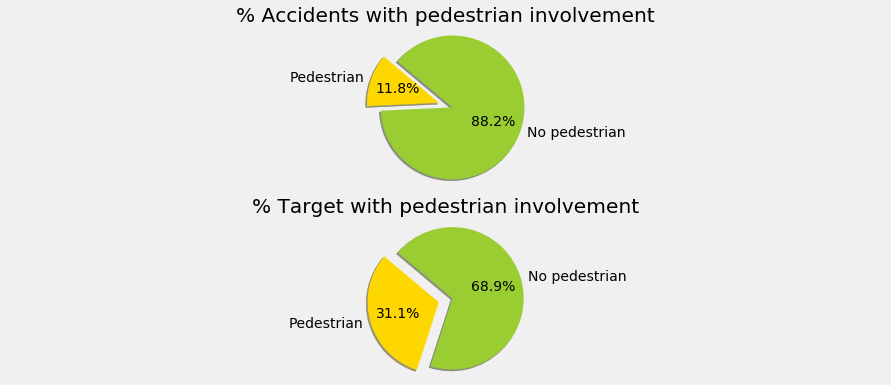

In [111]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,6))
labels = ['Pedestrian', 'No pedestrian']
ped_acc = len(accidents[accidents['is_role_pedestrian'] == 1])
no_ped_acc = number_total_accidents - len(accidents[accidents['is_role_pedestrian'] == 1])
sizes_acc = [ped_acc, no_ped_acc]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents with pedestrian involvement")
#labels = list(mediate_cause_df.index)
ped_target = len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['target'] > 0)])
no_ped_target = number_total_target - len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['target'] > 0)])
sizes = [ped_target, no_ped_target]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Target with pedestrian involvement")
plt.show()

### The field 'pedestrian_cause' explains how th pedestrian is involved in the accident. 
#### First, in how many accidents there was a pedestrian involved?

In [114]:
pedestrian = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause').agg({'incident_#': 'count', 'target': 'sum'})
pedestrian.columns = ['number_accidents', 'target']


print("Number of accidents with pedestrain: ", pedestrian['number_accidents'].sum())
print("Percentage over total: ", round((pedestrian['number_accidents'].sum()/number_total_accidents)*100,2),'%')
print("Number of taget in accidents with pedestrain: ", pedestrian['target'].sum())
print("Percentage over total: ", round((pedestrian['target'].sum()/number_total_target)*100,2),'%')


print('Percentage of accidents with pedestrian of unknown cause: ',\
      round((pedestrian.at['unknown', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')
print('Percentage of accidents with pedestrains where the pedestrian is not reponsible: ',\
      round((pedestrian.at['No peds fault', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')

clean_pedestrian= pedestrian.drop(['unknown', 'No peds fault'])
clean_pedestrian['average_accidents'] = round(clean_pedestrian['number_accidents']/clean_pedestrian['number_accidents'].sum(), 2)*100
clean_pedestrian.sort_values(by='average_accidents', ascending=False, inplace=True)
clean_pedestrian['average_accidents'] = [str(round(x,2)) + '%' for x in clean_pedestrian['average_accidents']]
# print('Out of the ones of known causes where the pedestrian is responsible; What are the causes?',round((pedestrian.drop('unknown').at['No peds fault','incident_#']\
#        /pedestrian.drop('No peds fault')['number_accidents'].sum())*100,2), '%')
#clean_pedestrian.drop('Other')
print("Rest of causes and its average: ")
clean_pedestrian

Number of accidents with pedestrain:  10267
Percentage over total:  11.84 %
Number of taget in accidents with pedestrain:  685
Percentage over total:  31.12 %
Percentage of accidents with pedestrian of unknown cause:  31.89 %
Percentage of accidents with pedestrains where the pedestrian is not reponsible:  25.91 %
Rest of causes and its average: 


,number_accidents,target,average_accidents
pedestrian_cause,,,
Crossing outside ped crossing,1772,166,41.0%
Disobey the traffic light signal,1561,173,36.0%
Other,662,36,15.0%
Cross through the road,326,19,8.0%
Disobey other signals,12,0,0.0%


## One Final Note

In [37]:
### Despite "Crossing
print("Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round(((1772+1561)/pedestrian['number_accidents'].sum())*100, 2),'%')
print("Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round((52/pedestrian['number_deaths'].sum())*100, 2),'%')

Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 32.46 %
Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 52.0 %


# Vehicles

In [116]:
is_vehicle_list = [x for x in accidents.columns if 'is_vehicle' in x][0:9]
#is_vehicle_list = [x.strip('_')[-1] for x in is_vehicle_list]
#motorbike
print("Number of accidents with motorbikes: ", len(accidents[accidents['is_vehicle_Motorbike'] == 1]))
print("Percentage of accidents with motorbikes: ",
      round((len(accidents[accidents['is_vehicle_Motorbike'] == 1])/number_total_accidents)*100, 2), '%')

Number of accidents with motorbikes:  42140
Percentage of accidents with motorbikes:  48.61 %


In [118]:
df_vehicle = pd.DataFrame(index=is_vehicle_list)
accidents_per_vehicle = []
deaths_per_vehicle = []
for item in is_vehicle_list:
    df_vehicle.at[item,'target'] = accidents[accidents[item] == 1]['target'].sum()
    df_vehicle.at[item,'number_accidents'] = accidents[accidents[item] == 1]['incident_#'].count()
    df_vehicle.at[item,'avg_accidents_per_vehicle'] = (accidents[accidents[item] == 1]['incident_#'].count()/number_total_accidents )*100
    df_vehicle.at[item, 'avg_target_per_vehicle'] = (accidents[accidents[item] == 1]['target'].sum()/number_total_target)*100
df_vehicle.index = [x.split('_')[-1] for x in df_vehicle.index]
df_vehicle

,target,number_accidents,avg_accidents_per_vehicle,avg_target_per_vehicle
unknown,0.0,7590.0,8.755739,0.000000
Motorbike,1318.0,42140.0,48.612233,59.881872
Car,417.0,16732.0,19.301848,18.945934
Moped,194.0,9557.0,11.024848,8.814175
Van,64.0,2267.0,2.615186,2.907769
Other vehicles,105.0,3306.0,3.813765,4.770559
Bicycle,143.0,5144.0,5.934061,6.497047
Bus,102.0,3128.0,3.608426,4.634257
Truck,37.0,492.0,0.567566,1.681054


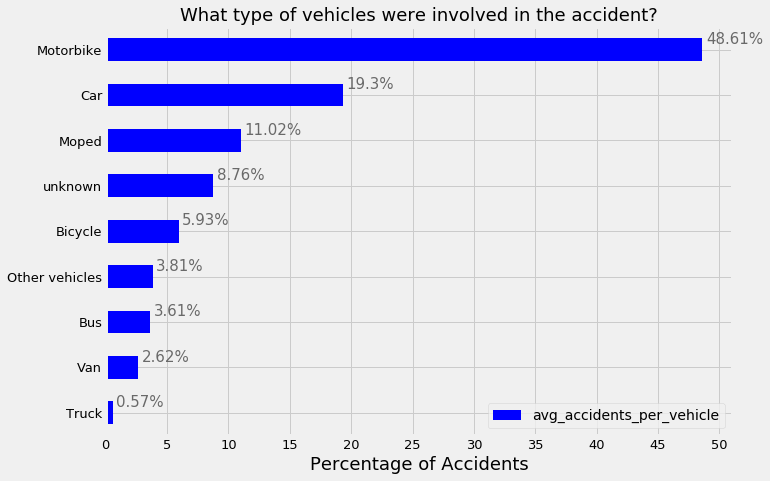

In [119]:


ax = df_vehicle.sort_values('avg_accidents_per_vehicle').plot(kind='barh', y = 'avg_accidents_per_vehicle',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved in the accident?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()


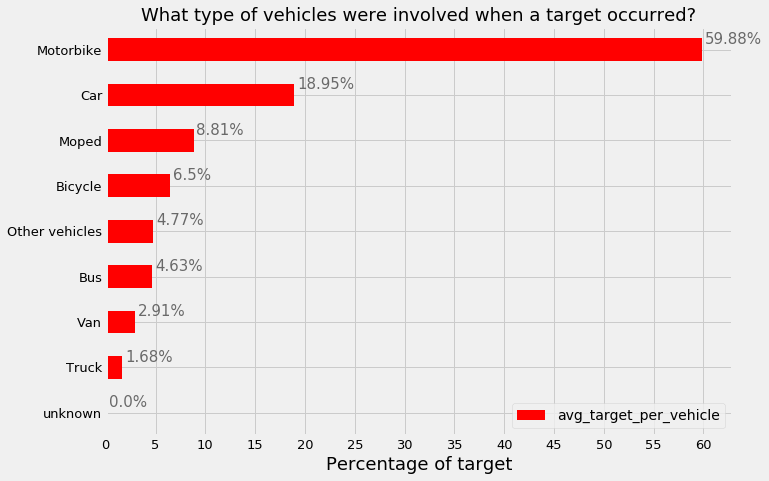

In [120]:

ax = df_vehicle.sort_values('avg_target_per_vehicle').plot(kind='barh', y = 'avg_target_per_vehicle', figsize=(10,7),
                                        color="red", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved when a target occurred?", fontsize=18)
ax.set_xlabel("Percentage of target", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

In [121]:
# I will compared the values for the most interested vehicles:
#     Motorbikes, Cars, Moped,Bus and Truck
interesting =['Motorbike', 'Car', 'Bus', 'Truck', 'Moped', 'Bicycle']
not_interesting = [x for x in df_vehicle.index if x not in interesting]
df_vehicle_short = df_vehicle.drop(not_interesting)
df_vehicle_short

,target,number_accidents,avg_accidents_per_vehicle,avg_target_per_vehicle
Motorbike,1318.0,42140.0,48.612233,59.881872
Car,417.0,16732.0,19.301848,18.945934
Moped,194.0,9557.0,11.024848,8.814175
Bicycle,143.0,5144.0,5.934061,6.497047
Bus,102.0,3128.0,3.608426,4.634257
Truck,37.0,492.0,0.567566,1.681054


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


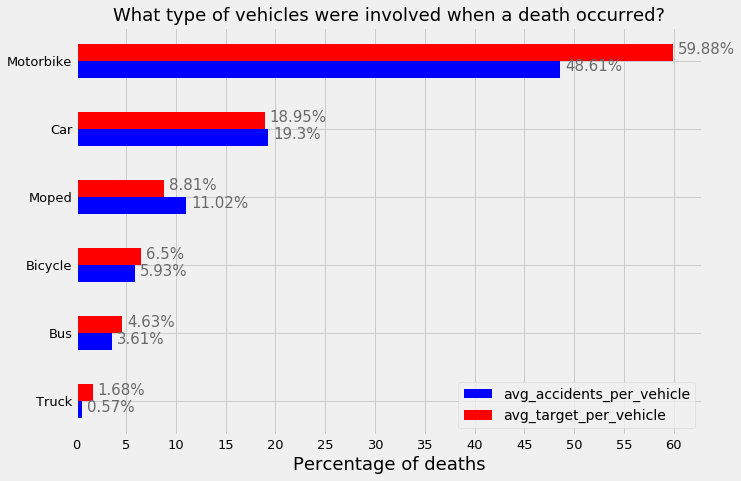

In [122]:
ax = df_vehicle_short.sort_values('avg_target_per_vehicle').plot(kind='barh', y = ['avg_accidents_per_vehicle','avg_target_per_vehicle'], figsize=(10,7),
                                        color=["blue","red"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved when a death occurred?", fontsize=18)
ax.set_xlabel("Percentage of deaths", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.5, i.get_y()+.1, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

# Finally, what is the deadliest vehicle?
## Let's divide de amount of deaths in accidents where such a vehicle took part by the number of accidents in which the vehicle was involved

In [123]:
df_vehicle['deadly_ratio'] =( df_vehicle['target']/df_vehicle['number_accidents'])*100
df_vehicle

,target,number_accidents,avg_accidents_per_vehicle,avg_target_per_vehicle,deadly_ratio
unknown,0.0,7590.0,8.755739,0.000000,0.000000
Motorbike,1318.0,42140.0,48.612233,59.881872,3.127670
Car,417.0,16732.0,19.301848,18.945934,2.492230
Moped,194.0,9557.0,11.024848,8.814175,2.029926
Van,64.0,2267.0,2.615186,2.907769,2.823114
Other vehicles,105.0,3306.0,3.813765,4.770559,3.176044
Bicycle,143.0,5144.0,5.934061,6.497047,2.779938
Bus,102.0,3128.0,3.608426,4.634257,3.260870
Truck,37.0,492.0,0.567566,1.681054,7.520325


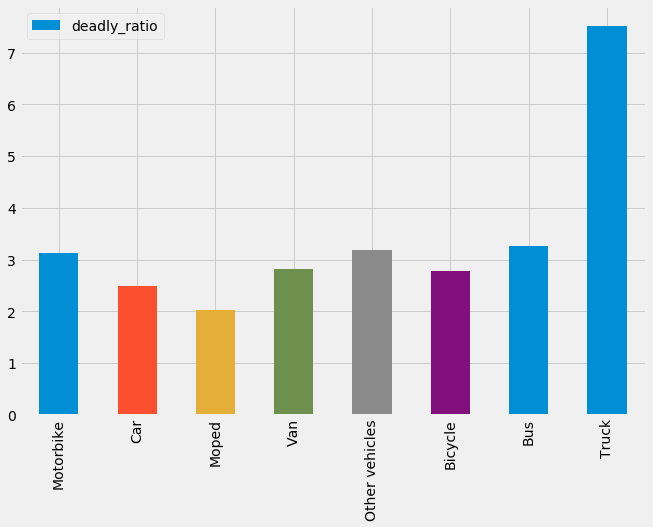

In [124]:
df_vehicle.drop('unknown').plot(kind='bar', y='deadly_ratio', figsize=(10,7));

# Analyzing ages

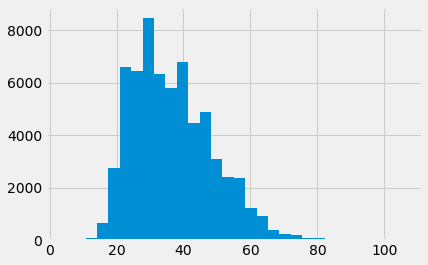

In [127]:
#Driver's Age in accidents
accidents_age_driver_clean =accidents[accidents['age_driver'] !=0]
plt.hist(accidents_age_driver_clean['age_driver'], bins=30);

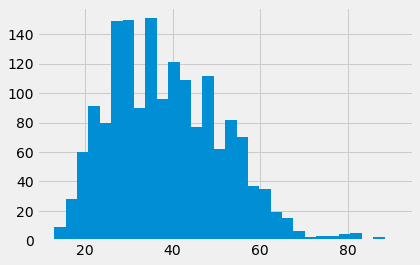

In [125]:
#Driver's age in target
accidents_age_driver_clean_target =accidents[(accidents['age_driver'] !=0) & (accidents['target'] > 0)]

plt.hist(accidents_age_driver_clean_target['age_driver'], bins=30);

27 Rectangle(xy=(27, 0), width=3, height=6457, angle=0)


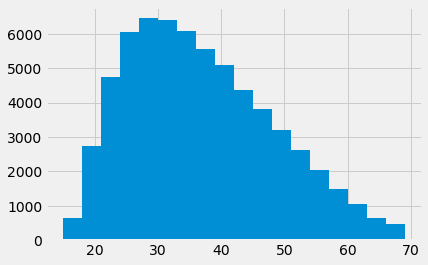

In [128]:
bins = [x for x in range(15,70,3)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(accidents_age_driver_clean['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

27 Rectangle(xy=(27, 0), width=3, height=158, angle=0)


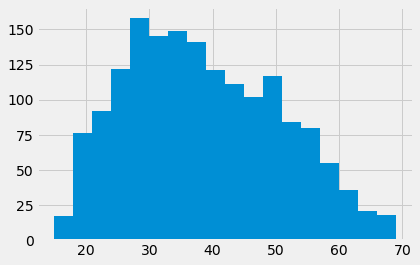

In [129]:
bins = [x for x in range(15,70,3)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(accidents_age_driver_clean_target['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

# Driver's gender

In [133]:
# What about the gender of the driver?

print("Men driving some vehicle in the accident: ",len(accidents[accidents['is_male_driver'] >0]),"\n")
print("Women driving any vehicle in the accident: ",len(accidents[accidents['is_female_driver'] > 0]), '\n')
print("Only men driving in the accident: ",len(accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]), "\n")
print("Only women driving in the accident: ", len(accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]))
only_man = accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]
only_woman = accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]


Men driving some vehicle in the accident:  47888 

Women driving any vehicle in the accident:  18747 

Only men driving in the accident:  45549 

Only women driving in the accident:  16408


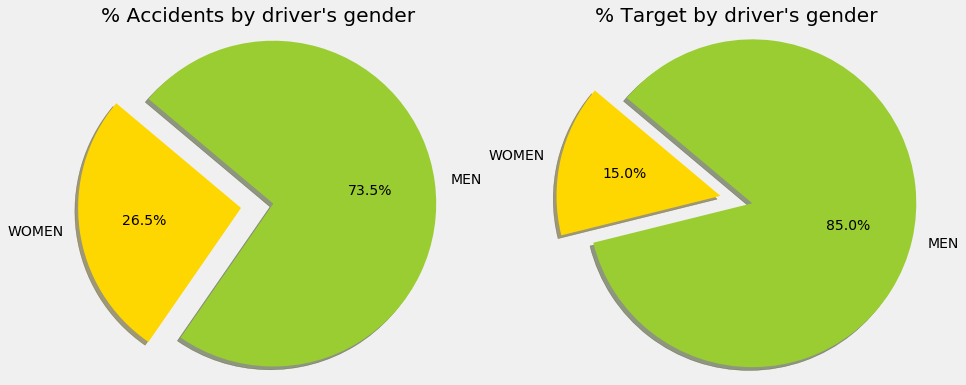

In [134]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['WOMEN', 'MEN']
sizes_acc = [(only_woman['incident_#'].count()/number_total_accidents)*100, (only_man['incident_#'].count()/number_total_accidents)*100]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by driver's gender")
sizes_de = [(only_woman['target'].sum()/number_total_target)*100, (only_man['target'].sum()/number_total_target)*100]
ax2.pie(sizes_de, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Target by driver's gender")
plt.show()

In [136]:
age_driver_man = accidents[(accidents['age_driver'] !=0) & accidents['is_female_driver'] == 0]
age_driver_woman=accidents[(accidents[])]

68454

# Type Accident

In [137]:
type_columns = [x for x in accidents.columns if 'type' in x][-11::]
type_df = pd.DataFrame(index=type_columns)
for col in type_columns:
    type_df.at[col,'target'] = accidents[accidents[col] == 1]['target'].sum()
    type_df.at[col,'number_accidents'] = accidents[accidents[col] == 1]['incident_#'].count()
type_df.index = [x[8::] for x in type_df.index]
type_df

,target,number_accidents
lateral_collision,937.0,37113.0
rear-end_collision,222.0,21299.0
frontal-lateral_collision,621.0,16915.0
run_over,691.0,10605.0
fall--motorcycle,222.0,8786.0
crash_into_stationary,208.0,7109.0
multiple_rear-end_collision,19.0,3054.0
Other_types,49.0,2608.0
fall_inside_vehicle,57.0,2318.0
frontal_collision,65.0,1154.0


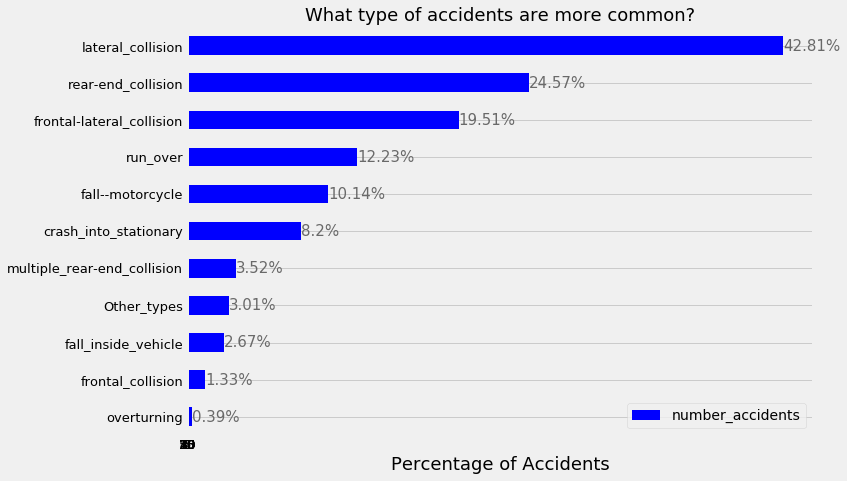

In [138]:
ax = type_df.plot(kind='barh', y = 'number_accidents',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/number_total_accidents)*100,2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
ax.invert_yaxis()


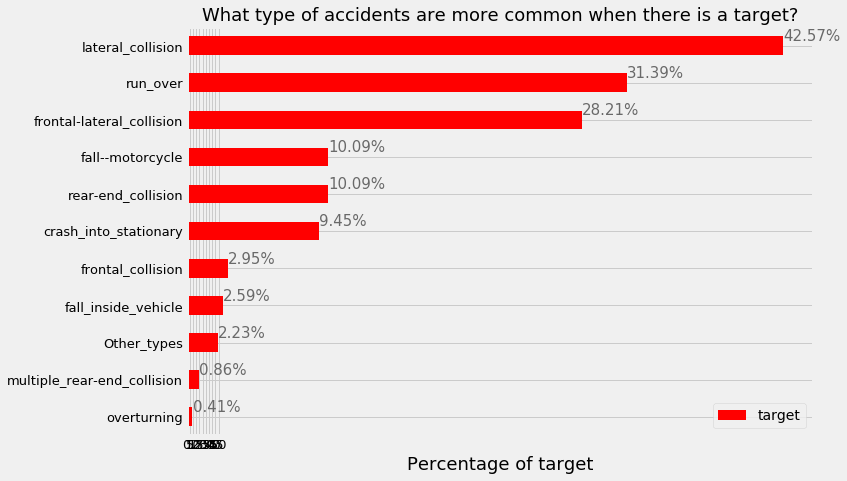

In [142]:
ax = type_df.sort_values('target').plot(kind='barh', y = 'target',figsize=(10,7),
                                        color="r", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common when there is a target?", fontsize=18)
ax.set_xlabel("Percentage of target", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/number_total_target)*100,2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


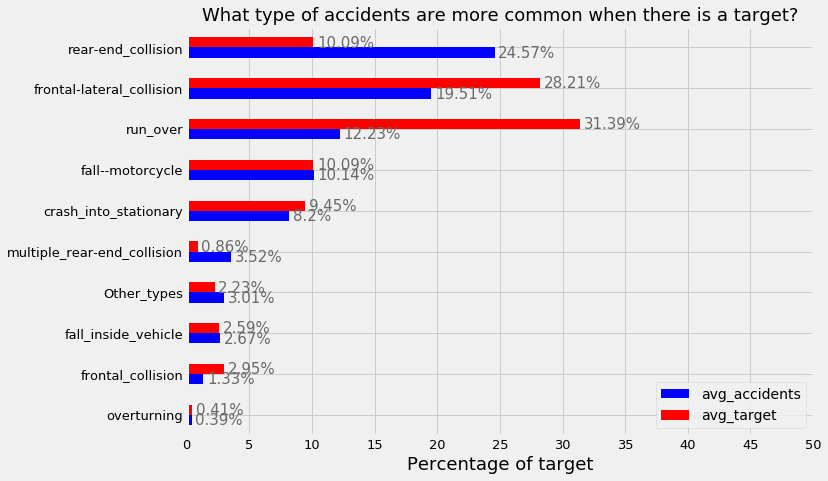

In [157]:
type_df['avg_accidents'] = (type_df['number_accidents']/number_total_accidents)*100
type_df['avg_target'] = (type_df['target']/number_total_target)*100
ax = type_df.sort_values('number_accidents').head(10).plot(kind='barh', y = ['avg_accidents','avg_target'],figsize=(10,7),
                                        color=["b","r"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common when there is a target?", fontsize=18)
ax.set_xlabel("Percentage of target", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+0, \
            str(round(i.get_width(),2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()

In [ ]:
brand color senority and plotting latitude and longitude